## Problem 6

In [13]:
# Imports
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

*** No CODEPAGE record, no encoding_override: will use 'ascii'
[[11  1]
 [ 1 12]]
[[10  2]
 [ 2 11]]
[[12  0]
 [ 0 13]]


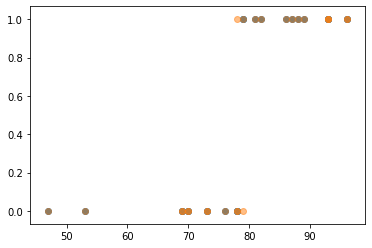

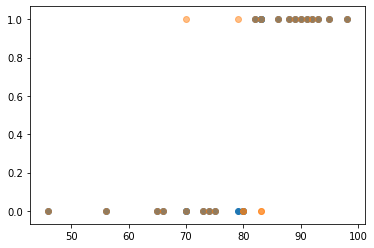

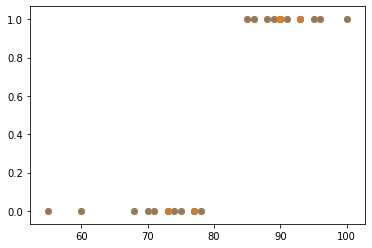

In [16]:
# Load data
data = pandas.read_excel('data.xls')

X1 = data.to_numpy()[:, 0].reshape(-1, 1)
X2 = data.to_numpy()[:, 1].reshape(-1, 1)
X3 = data.to_numpy()[:, 2].reshape(-1, 1)
y = data.to_numpy()[:, 3]

# For logistic regression, our "true" case is when the value of the final exam is >=160.
y = [1 if i >= 160 else 0 for i in y]

# Iterate through different X values and fit logistic predictors based off of them
for X in [X1, X2, X3]:
    model = LogisticRegression(solver="lbfgs")
    model.fit(X, y)
    y_predict = model.predict(X)
    print(confusion_matrix(y_predict, y))
    
    plt.figure()
    plt.scatter(X[:, 0], y_predict)
    plt.scatter(X[:, 0], y, alpha=0.5)



### Problem 6B

[[11  1]
 [ 1 12]]
[[12  0]
 [ 0 13]]
[[12  0]
 [ 0 13]]


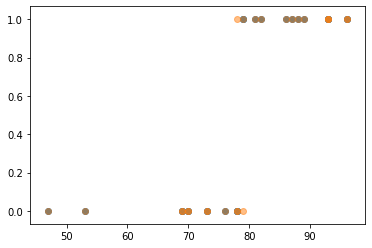

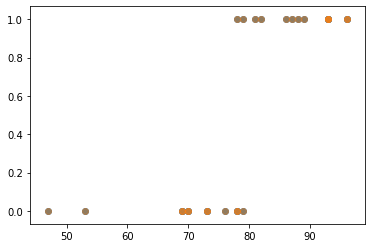

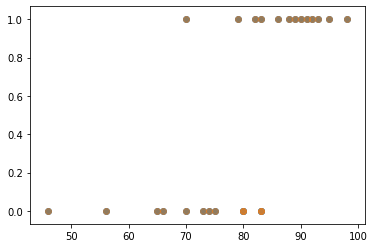

In [17]:
# Iterate through different X values and fit linear predictors based off of them
X1X2 = data.to_numpy()[:, 0:2]
X1X3 = data.to_numpy()[:, 0:3:2]
X2X3 = data.to_numpy()[:, 1:3]

for X in [X1X2, X1X3, X2X3]:
    model = LogisticRegression(solver='lbfgs')
    model.fit(X, y)
    y_predict = model.predict(X)
    print(confusion_matrix(y_predict, y))
    
    plt.figure()
    plt.scatter(X[:, 0], y_predict)
    plt.scatter(X[:, 0], y, alpha=0.5)  
    

### Problem 6C

[[12  0]
 [ 0 13]]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


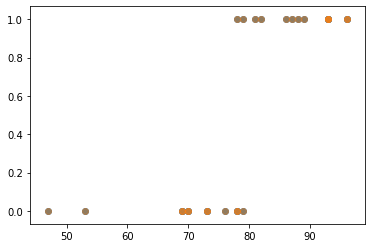

In [20]:
X = data.to_numpy()[:, :]
model = LogisticRegression(solver='lbfgs', multi_class='auto', dual=False, max_iter=100000)
model.fit(X, y)
y_predict = model.predict(X)
print(confusion_matrix(y_predict, y))

plt.figure()
plt.scatter(X[:, 0], y_predict)
plt.scatter(X[:, 0], y, alpha=0.5)

print(model)
